In [2]:
# Packages importation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data load

df_2008 = pd.read_csv('all_alpha_08.csv')
df_2018 = pd.read_csv('all_alpha_18.csv')


### Initial Analysis

#### 2008 Dataset

In [3]:
# Count of samples and columns
print('The number of rows and columns is: {}.'.format(df_2008.shape))

# Number of duplicated rows
print('There are {} duplicated rows in the dataset.'.format(df_2008.duplicated().sum()))

# Number of rows with missing values
print('There are {} rows with missing info in this dataset'.format(df_2008.isna().any(axis = 1).sum()))

# Datatypes 
print('\nThe datatypes for the 2008 dataset are: \n {}'.format(df_2008.dtypes))

# Unique values
print('\nThe unique non-null values for the SmartWay field are: \n{}'.format(df_2008['SmartWay'].value_counts()))
print('\nThe unique non-null values for the Sales Area field are: \n{}'.format(df_2008['Sales Area'].value_counts()))
print('\nThe unique non-null values for the Transmision Area field are: \n{}'.format(df_2008['Trans'].value_counts()))

The number of rows and columns is: (2404, 18).
There are 25 duplicated rows in the dataset.
There are 199 rows with missing info in this dataset

The datatypes for the 2008 dataset are: 
 Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

The unique non-null values for the SmartWay field are: 
no     1766
yes     638
Name: SmartWay, dtype: int64

The unique non-null values for the Sales Area field are: 
FA    1157
CA    1084
FC     163
Name: Sales Area, dt

#### 2018 Dataset

In [4]:
# Count of samples and columns
print('The number of rows and columns is: {}.'.format(df_2018.shape))

# Number of duplicated rows
print('There are {} duplicated rows in the dataset.'.format(df_2018.duplicated().sum()))

# Number of rows with missing values
print('There are {} rows with missing info in this dataset'.format(df_2018.isna().any(axis = 1).sum()))

#Datatypes
print('The datatypes for the 2018 dataset are: \n {}'.format(df_2018.dtypes))

# Unique values
print('\nThe unique non-null values for the SmartWay field are: \n{}'.format(df_2018['SmartWay'].value_counts()))

print('\nThe unique non-null values for the Cert Region field are: \n{}'.format(df_2018['Cert Region'].value_counts()))


The number of rows and columns is: (1611, 18).
There are 0 duplicated rows in the dataset.
There are 2 rows with missing info in this dataset
The datatypes for the 2018 dataset are: 
 Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

The unique non-null values for the SmartWay field are: 
No       1414
Yes       175
Elite      22
Name: SmartWay, dtype: int64

The unique non-null values for the Cert Region field are: 
FA    813
CA    798
Name: Cert Region,

#### Fuel Types (2008 Vs. 2018)

In [5]:
print(df_2008['Fuel'].value_counts())

print(df_2018['Fuel'].value_counts())

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64
Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64


#### Columns Cleaning

In [6]:
# 2008 drop 
df_2008.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis = 1, inplace = True)

# 2018 drop
df_2018.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis = 1, inplace = True)

In [7]:
df_2008.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [8]:
# Renaming Columns for consistency
df_2018.rename({'Sales Area' : 'Cert Region'}, axis = 1, inplace = True)
df_2008.rename({'Sales Area' : 'Cert Region'}, axis = 1, inplace = True)

In [9]:
# Renaming columns for ease of work

for col in df_2018.columns:
    words = col.split()
    a = map(lambda x: x.lower(), words)
    words = list(a)
    new_col = '_'.join(words)
    df_2018.rename({str(col) : str(new_col)}, axis = 1, inplace = True)

for col in df_2008.columns:
    words = col.split()
    a = map(lambda x: x.lower(), words)
    words = list(a)
    new_col = '_'.join(words)
    df_2008.rename({str(col) : str(new_col)}, axis = 1, inplace = True)

### Filtering
We're going to leave just the cars that have been certified by CA standards

In [10]:
df_2018.query('cert_region == "CA"', inplace = True)

In [11]:
df_2008.query('cert_region == "CA"', inplace = True)

In [12]:
# Checking that only CA values are remaining
print(df_2008['cert_region'].unique())
print(df_2018['cert_region'].unique())

['CA']
['CA']


In [13]:
# Dropping the Certification column because it's no longer needed

df_2008.drop('cert_region', inplace = True, axis = 1)
df_2018.drop('cert_region', inplace = True, axis = 1)

In [14]:
# Dropping Columns with null values
df_2008.dropna(inplace= True)
df_2018.dropna(inplace=True)

# Dropping columns with duplicated values
df_2008.drop_duplicates(inplace=True)
df_2018.drop_duplicates(inplace=True)

### Casting Datatypes for Consistency

In [15]:
# Cylinder column datatypes for consistency
df_2008['cyl'] = df_2008['cyl'].str.extract('(\d+)').astype('int64')
df_2018.astype({'cyl' : 'int64'})

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small SUV,7,26/60,28/58,26/59,10,Elite
1603,VOLVO XC 90,2.0,4,SemiAuto-8,2WD,Gasoline,standard SUV,5,22,29,25,5,No
1605,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,5,22,28,24,5,No
1607,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,5,20,27,23,5,No


In [16]:
""" 
We can observe that some columns have values that are of the following format "6/5",
which is the values for two different types of fuel if the car uses a mix of fuels or hybrid.
We need to separate this in order for our analysis to work.
"""
# 2008 cleaning
df_hyb_08 = df_2008[df_2008['fuel'].str.contains('/')]
df1 = df_hyb_08.copy()
df2 = df_hyb_08.copy()

split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

new_rows = df1.append(df2)

df_2008.drop(df_hyb_08.index, inplace=True)

df_2008 = df_2008.append(new_rows, ignore_index= True)

/var/folders/yv/tcwpp6310b54wsdrfcqhjbyh0000gn/T/ipykernel_3956/3973320962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df2)
/var/folders/yv/tcwpp6310b54wsdrfcqhjbyh0000gn/T/ipykernel_3956/3973320962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2008 = df_2008.append(new_rows, ignore_index= True)


In [17]:
# 2018 cleaning

df_hyb_18 = df_2018[df_2018['fuel'].str.contains('/')]

df1 = df_hyb_18.copy() 
df2 = df_hyb_18.copy()

split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])

new_rows = df1.append(df2)

df_2018.drop(df_hyb_18.index, inplace = True)

df_2018 = df_2018.append(new_rows, ignore_index = True)

/var/folders/yv/tcwpp6310b54wsdrfcqhjbyh0000gn/T/ipykernel_3956/2584393945.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df2)
/var/folders/yv/tcwpp6310b54wsdrfcqhjbyh0000gn/T/ipykernel_3956/2584393945.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2018 = df_2018.append(new_rows, ignore_index = True)


In [18]:
# Fix air_pollution_score datatypes
df_2008 = df_2008.astype({'air_pollution_score':'float'})
df_2018 = df_2018.astype({'air_pollution_score':'float'})

In [19]:
df_2008 = df_2008.astype({'city_mpg' : 'float', 'hwy_mpg' : 'float', 'cmb_mpg' : 'float'})
df_2018 = df_2018.astype({'city_mpg' : 'float', 'hwy_mpg' : 'float', 'cmb_mpg' : 'float'})

In [20]:
df_2008 = df_2008.astype({'greenhouse_gas_score' : 'int64'})
df_2018 = df_2018.astype({'cyl' : 'int64'})

### Data Visualization

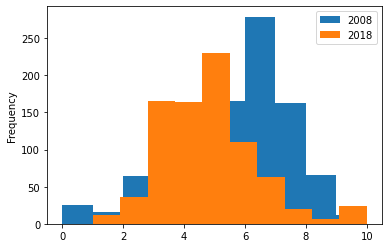

In [21]:
from cProfile import label


df_2008['greenhouse_gas_score'].plot(kind= 'hist', label = '2008')
df_2018['greenhouse_gas_score'].plot(kind = 'hist', label = '2018')
plt.legend()

<AxesSubplot:ylabel='Frequency'>

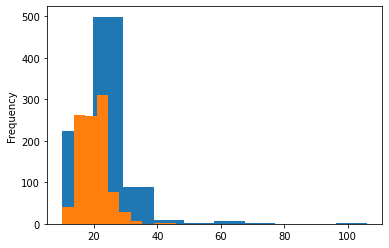

In [22]:
df_2018['cmb_mpg'].plot(kind = 'hist')
df_2008['cmb_mpg'].plot(kind = 'hist')

In [23]:
df_2018.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


Text(0.5, 1.0, 'Displacement VS MPG')

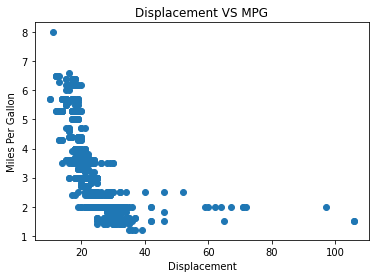

In [24]:
# Correlation between Displacement and combined Miles Per Gallon
plt.scatter(data= df_2018, y = 'displ', x = 'cmb_mpg')
plt.xlabel('Displacement')
plt.ylabel('Miles Per Gallon')
plt.title('Displacement VS MPG')

Text(0.5, 1.0, 'Greenhousr Gas Score VS. Combined MPG')

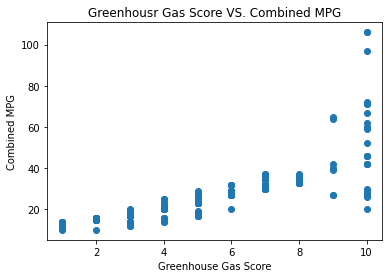

In [25]:
plt.scatter(data= df_2018, x = 'greenhouse_gas_score', y= 'cmb_mpg')
plt.xlabel('Greenhouse Gas Score')
plt.ylabel('Combined MPG')
plt.title('Greenhousr Gas Score VS. Combined MPG')

In [26]:
df_2008.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


### Are more unique models using alternative sources of fuel? By how much?

In [27]:
print('The available fuels in 2008 were: \n{}'.format(df_2008.fuel.value_counts()))
print('The available fuels in 2018 were: \n{}'.format(df_2018.fuel.value_counts()))

The available fuels in 2008 were: 
Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64
The available fuels in 2018 were: 
Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64


There were 2 alternative source of fuel in 2008 (Ethanol and CNG) and two in 2018 (Ethanol and Electricity). Let's now see how many unique models were available with alternative fuels.

In [28]:
alt_08 = df_2008.query('fuel in ["ethanol", "CNG"]').model.nunique()
alt_18 = df_2018.query('fuel in ["Ethanol", "Electricity"]').model.nunique()

print('There were {} models of cars using alternative fuels in 2008.'.format(alt_08))
print('There were {} models of cars using alternative fuels in 2018.'.format(alt_18))
print("That's a {} % variation.".format(((alt_18 - alt_08)/ alt_08)*100))


There were 2 models of cars using alternative fuels in 2008.
There were 26 models of cars using alternative fuels in 2018.
That's a 1200.0 % variation.


### How much have vehicle classes improved in fuel economy?

Average Combined MPG in 2008 for Each Vehicle Class is: 
veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

Average Combined MPG in 2008 for Each Vehicle Class is: 
veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64



Text(0, 0.5, 'Imprevement in MPG')

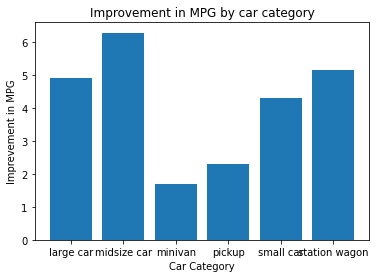

In [29]:
v_08 = df_2008.groupby('veh_class').cmb_mpg.mean()
v_18 = df_2018.groupby('veh_class').cmb_mpg.mean()

print('Average Combined MPG in 2008 for Each Vehicle Class is: \n{}\n'.format(v_08))
print('Average Combined MPG in 2008 for Each Vehicle Class is: \n{}\n'.format(v_18))

imp = v_18 - v_08
imp.dropna(inplace = True)
plt.bar(imp.index, imp)
plt.title('Improvement in MPG by car category')
plt.xlabel('Car Category')
plt.ylabel('Imprevement in MPG')



### What are the characteristics of SmartWay vehicles? Have they changed over time? 

In [30]:
sm_08 = df_2008.groupby('smartway').mean()
sm_08

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
no,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
yes,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421


In [31]:
sm_18 = df_2018.groupby('smartway').mean()
sm_18

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
Elite,1.970588,4.000000,7.000000,53.235294,53.117647,53.000000,10.000000
No,3.270304,5.720994,3.798343,19.325967,26.708564,22.041436,4.276243
Yes,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462


### What features are associated with better fuel economy?

In [32]:
best_08 = df_2008.query('cmb_mpg > cmb_mpg.mean()')
best_18 = df_2018.query('cmb_mpg > cmb_mpg.mean()')

print('This are the caracteristics of efficient cars in 2008: \n{}\n'.format(best_08.describe()))
print('This are the caracteristics of efficient cars in 2018: \n{}\n'.format(best_18.describe()))

This are the caracteristics of efficient cars in 2008: 
            displ         cyl  air_pollution_score    city_mpg     hwy_mpg  \
count  519.000000  519.000000           519.000000  519.000000  519.000000   
mean     2.667823    4.890173             6.998073   20.317919   27.603083   
std      0.665551    1.034856             1.159565    3.198257    3.051120   
min      1.300000    4.000000             4.000000   17.000000   20.000000   
25%      2.300000    4.000000             6.000000   18.000000   25.000000   
50%      2.500000    4.000000             7.000000   20.000000   27.000000   
75%      3.000000    6.000000             7.000000   21.000000   29.000000   
max      6.000000    8.000000             9.500000   48.000000   45.000000   

          cmb_mpg  greenhouse_gas_score  
count  519.000000            519.000000  
mean    22.992293              6.639692  
std      2.926371              0.804935  
min     20.000000              6.000000  
25%     21.000000              

In [33]:
df_2008.to_csv('2008_clean.csv')
df_2018.to_csv('2018_clean.csv')